In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cleaned_dataset_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'
cleaned_data = pd.read_csv(cleaned_dataset_path)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


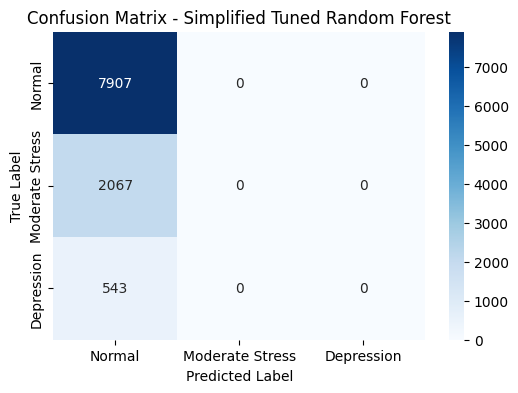

{'Best Parameters': {'class_weight': 'balanced',
  'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 'Accuracy': 0.7518303698773414,
 'Precision': 0.5652489050699001,
 'Recall': 0.7518303698773414,
 'F1 Score': 0.6453237879526855}

In [ ]:
features = [
    'Heart_Rate',
    'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic',
    'Skin_Temperature',
    'Respiration_Rate',
    'Sleep_Duration',
    'Activity_Levels',
    'Mood',
    'Stress_Level',
    'Resilience_Factors'
]
target = 'Mental_Health_Status'

X = cleaned_data[features]
y = cleaned_data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Simplified parameter grid for Random Forest
param_grid_simple = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Initialize the Random Forest model
rf_model_simple = RandomForestClassifier(random_state=100)

# Perform Grid Search with the simplified parameter grid
grid_search_simple = GridSearchCV(
    estimator=rf_model_simple,
    param_grid=param_grid_simple,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to the training data
grid_search_simple.fit(X_train, y_train)

# Retrieve the best parameters and model
best_params_simple = grid_search_simple.best_params_
best_rf_model_simple = grid_search_simple.best_estimator_

# Make predictions with the tuned model
y_pred_simple = best_rf_model_simple.predict(X_test)

# Calculate evaluation metrics for the tuned model
accuracy_simple = accuracy_score(y_test, y_pred_simple)
precision_simple = precision_score(y_test, y_pred_simple, average='weighted')
recall_simple = recall_score(y_test, y_pred_simple, average='weighted')
f1_simple = f1_score(y_test, y_pred_simple, average='weighted')

# Confusion Matrix
conf_matrix_simple = confusion_matrix(y_test, y_pred_simple)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_simple, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Normal", "Moderate Stress", "Depression"],
            yticklabels=["Normal", "Moderate Stress", "Depression"])
plt.title("Confusion Matrix - Simplified Tuned Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Display metrics for the tuned model
metrics_results_simple_rf = {
    "Best Parameters": best_params_simple,
    "Accuracy": accuracy_simple,
    "Precision": precision_simple,
    "Recall": recall_simple,
    "F1 Score": f1_simple
}

metrics_results_simple_rf

Neural Network

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1315/1315 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7298 - loss: 0.8320 - val_accuracy: 0.7518 - val_loss: 0.7167
Epoch 2/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7513 - loss: 0.7130 - val_accuracy: 0.7518 - val_loss: 0.6947
Epoch 3/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7482 - loss: 0.6995 - val_accuracy: 0.7518 - val_loss: 0.6896
Epoch 4/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7493 - loss: 0.6954 - val_accuracy: 0.7518 - val_loss: 0.6880
Epoch 5/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7539 - loss: 0.6852 - val_accuracy: 0.7518 - val_loss: 0.6875
Epoch 6/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7470 - loss: 0.6964 - val_accuracy: 0.7518 - val_loss: 0.6874
Epoch 7/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7501 - loss: 0.6902 - val_accuracy: 0.7518 - val_loss: 0.6877
Epoch 8/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7495 - loss: 0.6920 - val_accura

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 0.7518
Precision: 0.5652
Recall: 0.7518
F1 Score: 0.6453


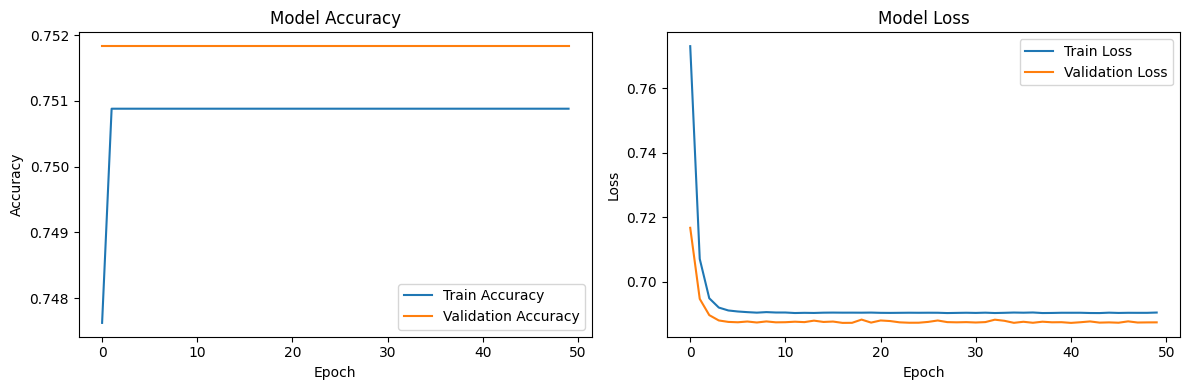

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/My Drive/ML Mental Health Monitoring System/data.csv')

# Define features and target
features = [
    'Heart_Rate', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic',
    'Skin_Temperature', 'Respiration_Rate', 'Sleep_Duration',
    'Activity_Levels', 'Mood', 'Stress_Level', 'Resilience_Factors'
]
target = 'Mental_Health_Status'

X = data[features]
y = data[target]

# One-hot encode the target variable
y_encoded = pd.get_dummies(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=100)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Neural Network with regularization
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(y_train.shape[1], activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict the test set
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test.values, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print results
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot Training History
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Updated Neural Network

SVM

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cleaned_dataset_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'
data = pd.read_csv(cleaned_dataset_path)

# Define features and target
features = [
    'Heart_Rate',
    'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic',
    'Skin_Temperature',
    'Respiration_Rate',
    'Sleep_Duration',
    'Activity_Levels',
    'Mood',
    'Stress_Level',
    'Resilience_Factors'
]
target = 'Mental_Health_Status'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [1, 10, 100],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['rbf']  # RBF kernel for non-linear relationships
}

# Initialize the SVM model
svm_model = SVC(probability=True, random_state=100)

# Perform Grid Search
grid_search_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to the training data
grid_search_svm.fit(X_train_scaled, y_train)

# Retrieve the best parameters and model
best_params_svm = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_

# Make predictions with the tuned model
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy_svm = grid_search_svm.best_score_  # Best cross-validation accuracy
test_accuracy = best_svm_model.score(X_test_scaled, y_test)  # Test accuracy

print(f"Best Parameters: {best_params_svm}")
print(f"Cross-Validation Accuracy: {accuracy_svm:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Normal', 'Moderate Stress', 'Depression']))

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Moderate Stress', 'Depression'],
            yticklabels=['Normal', 'Moderate Stress', 'Depression'])
plt.title("Confusion Matrix - Tuned SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



Fitting 5 folds for each of 9 candidates, totalling 45 fits


KeyboardInterrupt: 

In [ ]:
# cleaned_dataset_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'


Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [22:24:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and 

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.8}

Training Metrics:
Accuracy: 0.7514
Precision: 0.8132
Recall: 0.7514
F1 Score: 0.6450

Testing Metrics:
Accuracy: 0.7511
Precision: 0.5641
Recall: 0.7511
F1 Score: 0.6443

Classification Report (Testing):
                 precision    recall  f1-score   support

         Normal       0.75      1.00      0.86      7899
Moderate Stress       0.00      0.00      0.00      2065
     Depression       0.00      0.00      0.00       553

       accuracy                           0.75     10517
      macro avg       0.25      0.33      0.29     10517
   weighted avg       0.56      0.75      0.64     10517



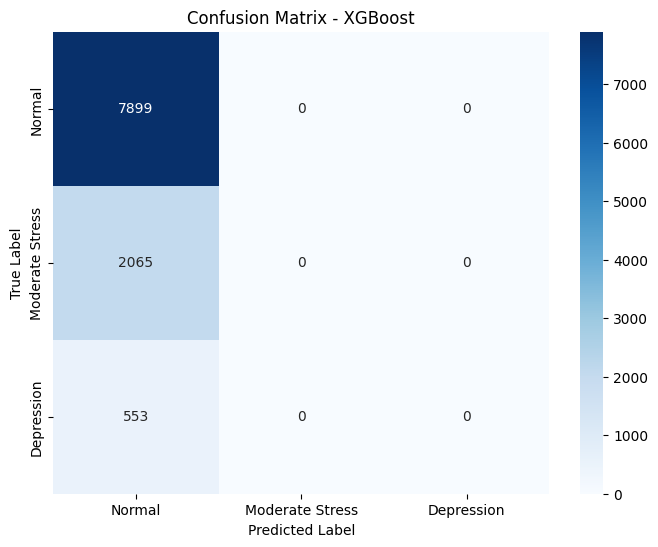

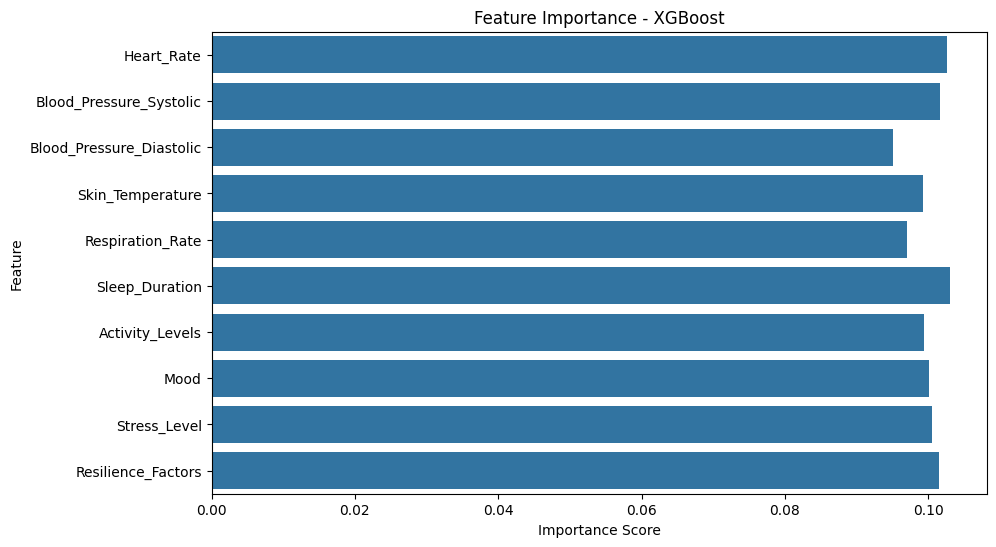

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cleaned_dataset_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'
data = pd.read_csv(cleaned_dataset_path)

# Define features and target
features = [
    'Heart_Rate',
    'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic',
    'Skin_Temperature',
    'Respiration_Rate',
    'Sleep_Duration',
    'Activity_Levels',
    'Mood',
    'Stress_Level',
    'Resilience_Factors'
]
target = 'Mental_Health_Status'

# Separate features (X) and target (y)
X = data[features]
y = data[target]

# Step 1: Handle Missing Values
# Fill missing values for numerical features with the median
X = X.fillna(X.median())

# Step 2: Encode Categorical Variables
# Identify categorical columns and encode them
categorical_columns = ['Mood', 'Stress_Level']  # Update if there are more categorical columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Step 3: Handle Class Imbalance
# Calculate class weights
class_weights = y.value_counts(normalize=True)
scale_pos_weight = class_weights[0] / class_weights[1]  # Adjust for imbalance

# Step 4: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

# Step 5: Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Define the Parameter Grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [1, scale_pos_weight],  # Handles class imbalance
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=100, use_label_encoder=False, eval_metric='mlogloss')

# Step 7: Perform Grid Search for Hyperparameter Tuning
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to the training data
grid_search_xgb.fit(X_train_scaled, y_train)

# Retrieve the best parameters and model
best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_

# Step 8: Make Predictions with the Tuned Model
y_pred_train = best_xgb_model.predict(X_train_scaled)
y_pred_test = best_xgb_model.predict(X_test_scaled)

# Step 9: Calculate Evaluation Metrics
metrics_train = {
    "Accuracy": accuracy_score(y_train, y_pred_train),
    "Precision": precision_score(y_train, y_pred_train, average='weighted'),
    "Recall": recall_score(y_train, y_pred_train, average='weighted'),
    "F1 Score": f1_score(y_train, y_pred_train, average='weighted')
}

metrics_test = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test, average='weighted'),
    "Recall": recall_score(y_test, y_pred_test, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_test, average='weighted')
}

# Print Metrics
print(f"Best Parameters: {best_params_xgb}")
print("\nTraining Metrics:")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.4f}")

print("\nTesting Metrics:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.4f}")

# Step 10: Classification Report
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_pred_test, target_names=['Normal', 'Moderate Stress', 'Depression']))

# Step 11: Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Moderate Stress', 'Depression'],
            yticklabels=['Normal', 'Moderate Stress', 'Depression'])
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 12: Feature Importance
plt.figure(figsize=(10, 6))
importance = best_xgb_model.feature_importances_
sns.barplot(x=importance, y=features)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cleaned_dataset_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'
data = pd.read_csv(cleaned_dataset_path)

# Define features and target
features = [
    'Heart_Rate',
    'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic',
    'Skin_Temperature',
    'Respiration_Rate',
    'Sleep_Duration',
    'Activity_Levels',
    'Mood',
    'Stress_Level',
    'Resilience_Factors'
]
target = 'Mental_Health_Status'

X = data[features]
y = data[target]

# Step 1: Handle Missing Values
X = X.fillna(X.median())

# Step 2: Encode Categorical Variables (in features)
categorical_columns = ['Mood', 'Stress_Level']
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Check class distribution
class_counts = np.bincount(y_encoded)
print("Class counts:", class_counts)

# Create sample weights for class imbalance (if needed)
# This gives higher weight to minority classes based on inverse class frequency
class_weights = {i: len(y_encoded)/class_counts[i] for i in range(len(class_counts))}
sample_weights = np.array([class_weights[i] for i in y_encoded])

# Step 4: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(X, y_encoded, sample_weights,
                                                                      test_size=0.2, random_state=100,
                                                                      stratify=y_encoded)

# Step 5: Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use a multiclass objective
# Since we have 3 classes, specify num_class=3
# For multiclass, scale_pos_weight is not typically used.
# We will rely on sample weights passed to the fit method.
xgb_model = XGBClassifier(
    random_state=100,
    objective='multi:softprob',
    num_class=3,
    eval_metric='mlogloss'
)

# Step 6: Define the Parameter Grid for XGBoost
# Remove scale_pos_weight since this is multiclass
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Step 7: Perform Grid Search for Hyperparameter Tuning
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_xgb.fit(X_train_scaled, y_train, sample_weight=sw_train)

# Retrieve the best parameters and model
best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_

# Step 8: Make Predictions with the Tuned Model
y_pred_train = best_xgb_model.predict(X_train_scaled)
y_pred_test = best_xgb_model.predict(X_test_scaled)

# Step 9: Calculate Evaluation Metrics
metrics_train = {
    "Accuracy": accuracy_score(y_train, y_pred_train),
    "Precision": precision_score(y_train, y_pred_train, average='weighted', zero_division=0),
    "Recall": recall_score(y_train, y_pred_train, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_train, y_pred_train, average='weighted', zero_division=0)
}

metrics_test = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_test, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
}

print(f"Best Parameters: {best_params_xgb}")
print("\nTraining Metrics:")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.4f}")

print("\nTesting Metrics:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.4f}")

# Step 10: Classification Report
class_names = label_encoder.inverse_transform([0, 1, 2])
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_pred_test, target_names=class_names, zero_division=0))

# Step 11: Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Step 12: Feature Importance
plt.figure(figsize=(10, 6))
importance = best_xgb_model.feature_importances_
sns.barplot(x=importance, y=features)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Class counts: [39495 10324  2766]
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}

Training Metrics:
Accuracy: 0.8451
Precision: 0.8904
Recall: 0.8451
F1 Score: 0.8545

Testing Metrics:
Accuracy: 0.5460
Precision: 0.5987
Recall: 0.5460
F1 Score: 0.5694

Classification Report (Testing):


TypeError: object of type 'numpy.float64' has no len()

XG Boost Updated

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:25:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}

Training Metrics:
Accuracy: 0.7511
Precision: 0.5641
Recall: 0.7511
F1 Score: 0.6443

Testing Metrics:
Accuracy: 0.7511
Precision: 0.5641
Recall: 0.7511
F1 Score: 0.6443

Classification Report (Testing):
                 precision    recall  f1-score   support

         Normal       0.75      1.00      0.86      7899
Moderate Stress       0.00      0.00      0.00      2065
     Depression       0.00      0.00      0.00       553

       accuracy                           0.75     10517
      macro avg       0.25      0.33      0.29     10517
   weighted avg       0.56      0.75      0.64     10517



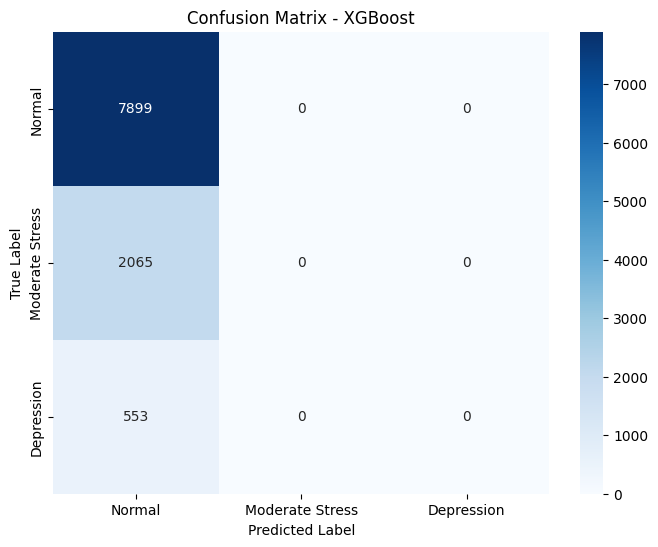

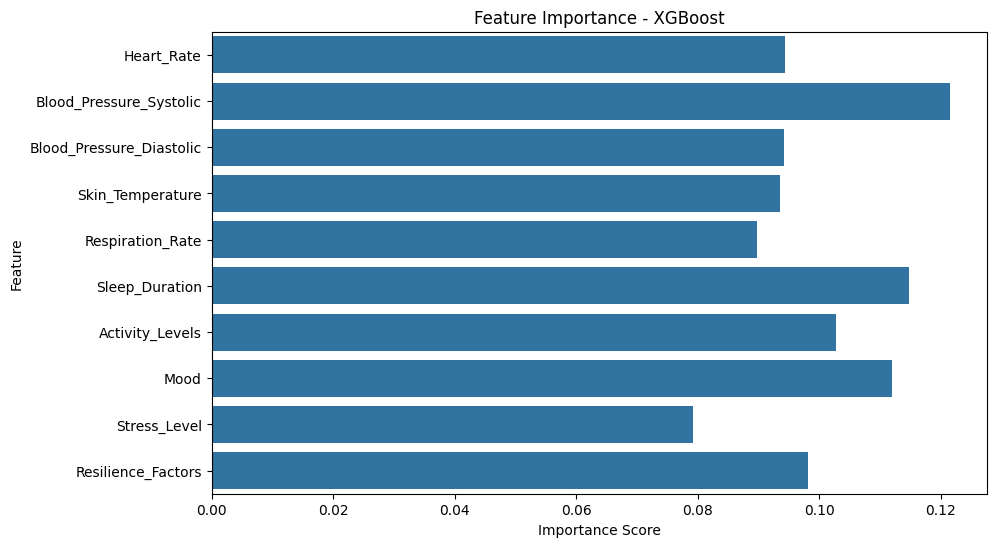

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cleaned_dataset_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'
data = pd.read_csv(cleaned_dataset_path)

# Define features and target
features = [
    'Heart_Rate',
    'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic',
    'Skin_Temperature',
    'Respiration_Rate',
    'Sleep_Duration',
    'Activity_Levels',
    'Mood',
    'Stress_Level',
    'Resilience_Factors'
]

target = 'Mental_Health_Status'

X = data[features]
y = data[target]

# Handle Missing Values
X = X.fillna(X.median())

# Encode Categorical Variables in Features
categorical_columns = ['Mood', 'Stress_Level']
for col in categorical_columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        X[col] = LabelEncoder().fit_transform(X[col])

# Encode the target variable
if y.dtype == 'object' or y.dtype.name == 'category':
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
else:
    # If y is already numeric but you know the classes correspond to:
    # 0 -> Normal, 1 -> Moderate Stress, 2 -> Depression
    # just ensure y is integers 0,1,2. If not, map them.
    # Example:
    # mapping = { ... } # define if needed
    # y_encoded = y.map(mapping)
    y_encoded = y.astype(int).values

# Class names as strings
class_names = ['Normal', 'Moderate Stress', 'Depression']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=100, stratify=y_encoded
)

# Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost model with multiclass objective
xgb_model = XGBClassifier(
    random_state=100,
    objective='multi:softprob',  # multiclass objective
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False
)

# Parameter Grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search for Hyperparameter Tuning
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search_xgb.fit(X_train_scaled, y_train)

# Best parameters and model
best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_

# Predictions
y_pred_train = best_xgb_model.predict(X_train_scaled)
y_pred_test = best_xgb_model.predict(X_test_scaled)

# Evaluate Metrics
metrics_train = {
    "Accuracy": accuracy_score(y_train, y_pred_train),
    "Precision": precision_score(y_train, y_pred_train, average='weighted', zero_division=0),
    "Recall": recall_score(y_train, y_pred_train, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_train, y_pred_train, average='weighted', zero_division=0)
}

metrics_test = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_test, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
}

print(f"Best Parameters: {best_params_xgb}")
print("\nTraining Metrics:")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.4f}")

print("\nTesting Metrics:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.4f}")

# Classification Report
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_pred_test, target_names=class_names, zero_division=0))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
importance = best_xgb_model.feature_importances_
sns.barplot(x=importance, y=features)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

########################################
# Tips to Improve Accuracy:
# - Check if the dataset is balanced. If heavily imbalanced, consider oversampling minority classes using SMOTE or undersampling.
# - Experiment with different metrics for grid search (e.g., 'f1_weighted') if accuracy isn't the best indicator.
# - Add or remove features, or apply feature selection techniques.
# - Try different models or ensembles.
########################################


Class distribution before balancing: [39495 10324  2766]
Class distribution after balancing: [31596 31596 31596]
Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:36:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

Training Metrics (after SMOTE):
Accuracy: 0.6193
Precision: 0.6192
Recall: 0.6193
F1 Score: 0.6121

Testing Metrics:
Accuracy: 0.5292
Precision: 0.6015
Recall: 0.5292
F1 Score: 0.5608

Classification Report (Testing):
                 precision    recall  f1-score   support

         Normal       0.75      0.65      0.69      7899
Moderate Stress       0.19      0.18      0.18      2065
     Depression       0.06      0.18      0.09       553

       accuracy                           0.53     10517
      macro avg       0.33      0.33      0.32     10517
   weighted avg       0.60      0.53      0.56     10517



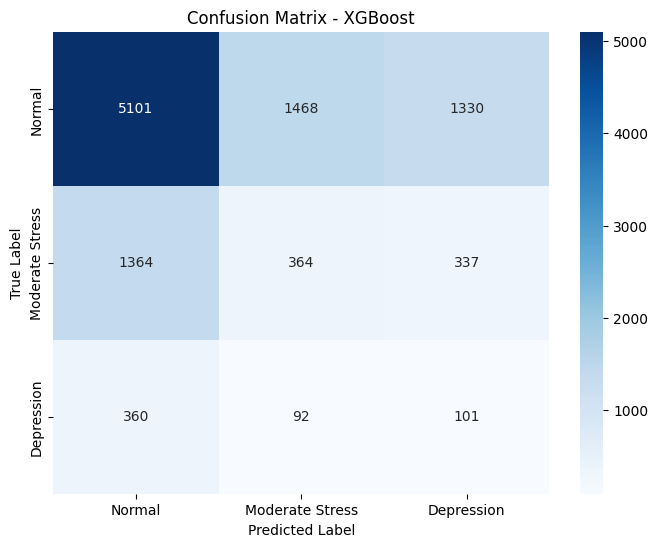

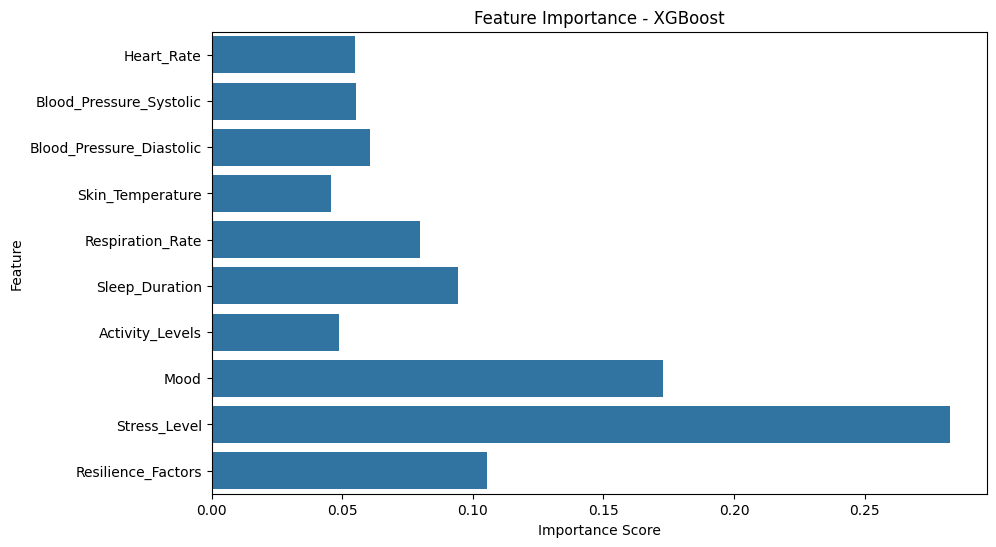

In [ ]:
!pip install imbalanced-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cleaned_dataset_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'
data = pd.read_csv(cleaned_dataset_path)

# Define features and target
features = [
    'Heart_Rate',
    'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic',
    'Skin_Temperature',
    'Respiration_Rate',
    'Sleep_Duration',
    'Activity_Levels',
    'Mood',
    'Stress_Level',
    'Resilience_Factors'
]

target = 'Mental_Health_Status'

X = data[features]
y = data[target]

# Handle Missing Values
X = X.fillna(X.median())

# Encode Categorical Variables in Features
categorical_columns = ['Mood', 'Stress_Level']
for col in categorical_columns:
    if X[col].dtype == 'object' or X[col].dtype.name == 'category':
        X[col] = LabelEncoder().fit_transform(X[col])

# Encode the target variable
if y.dtype == 'object' or y.dtype.name == 'category':
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
else:
    # If already numeric, ensure they are integers 0,1,2:
    y_encoded = y.astype(int).values

# Define class names
class_names = ['Normal', 'Moderate Stress', 'Depression']

# Check class distribution
class_counts = np.bincount(y_encoded)
print("Class distribution before balancing:", class_counts)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=100, stratify=y_encoded
)

# Apply SMOTE to handle class imbalance on the training set only
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
class_counts_res = np.bincount(y_train_res)
print("Class distribution after balancing:", class_counts_res)

# Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

# XGBoost model with multiclass objective
xgb_model = XGBClassifier(
    random_state=100,
    objective='multi:softprob',  # multiclass objective
    num_class=3,
    eval_metric='mlogloss',
    use_label_encoder=False
)

# Parameter Grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search for Hyperparameter Tuning with a balanced metric
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='f1_weighted',  # focus on balanced performance
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search_xgb.fit(X_train_scaled, y_train_res)

# Best parameters and model
best_params_xgb = grid_search_xgb.best_params_
best_xgb_model = grid_search_xgb.best_estimator_

# Predictions
y_pred_train = best_xgb_model.predict(X_train_scaled)
y_pred_test = best_xgb_model.predict(X_test_scaled)

# Evaluate Metrics
metrics_train = {
    "Accuracy": accuracy_score(y_train_res, y_pred_train),
    "Precision": precision_score(y_train_res, y_pred_train, average='weighted', zero_division=0),
    "Recall": recall_score(y_train_res, y_pred_train, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_train_res, y_pred_train, average='weighted', zero_division=0)
}

metrics_test = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred_test, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred_test, average='weighted', zero_division=0)
}

print(f"Best Parameters: {best_params_xgb}")
print("\nTraining Metrics (after SMOTE):")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.4f}")

print("\nTesting Metrics:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.4f}")

# Classification Report
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_pred_test, target_names=class_names, zero_division=0))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature Importance
plt.figure(figsize=(10, 6))
importance = best_xgb_model.feature_importances_
sns.barplot(x=importance, y=features)
plt.title("Feature Importance - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Training Metrics:
Accuracy: 0.7511
Precision: 0.5641
Recall: 0.7511
F1 Score: 0.6443

Testing Metrics:
Accuracy: 0.7511
Precision: 0.5641
Recall: 0.7511
F1 Score: 0.6443

Classification Report (Testing):
                 precision    recall  f1-score   support

         Normal       0.75      1.00      0.86      7899
Moderate Stress       0.00      0.00      0.00      2065
     Depression       0.00      0.00      0.00       553

       accuracy                           0.75     10517
      macro avg       0.25      0.33      0.29     10517
   weighted avg       0.56      0.75      0.64     10517



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


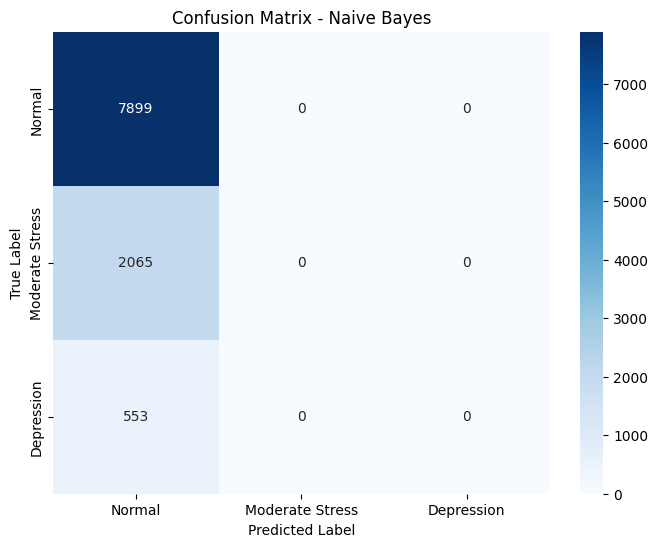

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cleaned_dataset_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'
data = pd.read_csv(cleaned_dataset_path)

# Define features and target
features = [
    'Heart_Rate',
    'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic',
    'Skin_Temperature',
    'Respiration_Rate',
    'Sleep_Duration',
    'Activity_Levels',
    'Mood',
    'Stress_Level',
    'Resilience_Factors'
]
target = 'Mental_Health_Status'

# Separate features (X) and target (y)
X = data[features]
y = data[target]

# Step 1: Handle Missing Values
# Fill missing values for numerical features with the median
X = X.fillna(X.median())

# Step 2: Encode Categorical Variables
# Identify categorical columns and encode them
categorical_columns = ['Mood', 'Stress_Level']  # Update if there are more categorical columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

# Step 4: Scale the Features (Naive Bayes doesn't require scaling, but it's a good practice for generalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize and Train the Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Step 6: Make Predictions
y_pred_train = nb_model.predict(X_train_scaled)
y_pred_test = nb_model.predict(X_test_scaled)

# Step 7: Calculate Evaluation Metrics
metrics_train = {
    "Accuracy": accuracy_score(y_train, y_pred_train),
    "Precision": precision_score(y_train, y_pred_train, average='weighted'),
    "Recall": recall_score(y_train, y_pred_train, average='weighted'),
    "F1 Score": f1_score(y_train, y_pred_train, average='weighted')
}

metrics_test = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test, average='weighted'),
    "Recall": recall_score(y_test, y_pred_test, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_test, average='weighted')
}

# Print Metrics
print("\nTraining Metrics:")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.4f}")

print("\nTesting Metrics:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.4f}")

# Step 8: Classification Report
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_pred_test, target_names=['Normal', 'Moderate Stress', 'Depression']))

# Step 9: Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Moderate Stress', 'Depression'],
            yticklabels=['Normal', 'Moderate Stress', 'Depression'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


# Load the dataset
cleaned_dataset_path = '/content/drive/My Drive/ML Mental Health Monitoring System/gd.csv'
data = pd.read_csv(cleaned_dataset_path)

# Define features and target
features = [
    'Heart_Rate',
    'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic',
    'Skin_Temperature',
    'Respiration_Rate',
    'Sleep_Duration',
    'Activity_Levels',
    'Mood',
    'Stress_Level',
    'Resilience_Factors'
]
target = 'Mental_Health_Status'

# Separate features (X) and target (y)
X = data[features]
y = data[target]

# Step 1: Handle Missing Values
# Fill missing values for numerical features with the median
X = X.fillna(X.median())

# Step 2: Encode Categorical Variables
# Identify categorical columns and encode them
categorical_columns = ['Mood', 'Stress_Level']  # Update if there are more categorical columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

# Step 4: Scale the Features (Naive Bayes doesn't require scaling, but it's a good practice for generalization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Initialize and Train the Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

# Step 6: Make Predictions
y_pred_train = nb_model.predict(X_train_scaled)
y_pred_test = nb_model.predict(X_test_scaled)

# Step 7: Calculate Evaluation Metrics
metrics_train = {
    "Accuracy": accuracy_score(y_train, y_pred_train),
    "Precision": precision_score(y_train, y_pred_train, average='weighted'),
    "Recall": recall_score(y_train, y_pred_train, average='weighted'),
    "F1 Score": f1_score(y_train, y_pred_train, average='weighted')
}

metrics_test = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test, average='weighted'),
    "Recall": recall_score(y_test, y_pred_test, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_test, average='weighted')
}

# Print Metrics
print("\nTraining Metrics:")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.4f}")

print("\nTesting Metrics:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.4f}")

# Step 8: Classification Report
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_pred_test, target_names=['Normal', 'Moderate Stress', 'Depression']))

# Step 9: Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Moderate Stress', 'Depression'],
            yticklabels=['Normal', 'Moderate Stress', 'Depression'])
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Best Parameters: {'C': 0.01, 'solver': 'liblinear'}

Training Metrics:
Accuracy: 0.7511
Precision: 0.5641
Recall: 0.7511
F1 Score: 0.6443

Testing Metrics:
Accuracy: 0.7511
Precision: 0.5641
Recall: 0.7511
F1 Score: 0.6443

Classification Report (Testing):
                 precision    recall  f1-score   support

         Normal       0.75      1.00      0.86      7899
Moderate Stress       0.00      0.00      0.00      2065
     Depression       0.00      0.00      0.00       553

       accuracy                           0.75     10517
      macro avg       0.25      0.33      0.29     10517
   weighted avg       0.56      0.75      0.64     10517



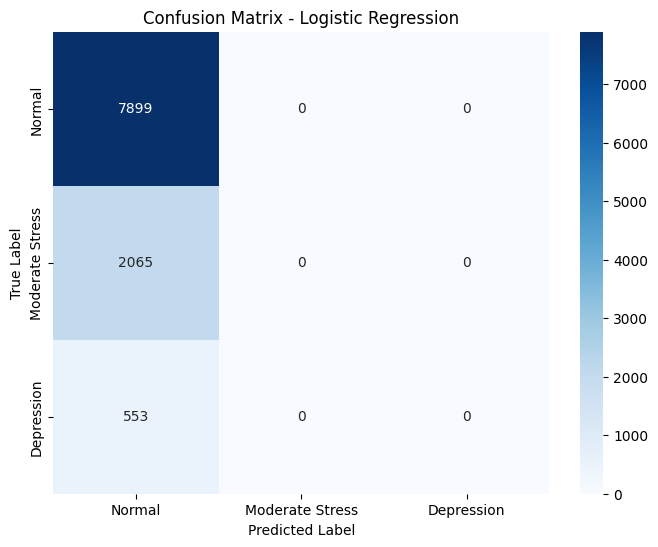

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cleaned_dataset_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'
data = pd.read_csv(cleaned_dataset_path)

# Define features and target
features = [
    'Heart_Rate',
    'Blood_Pressure_Systolic',
    'Blood_Pressure_Diastolic',
    'Skin_Temperature',
    'Respiration_Rate',
    'Sleep_Duration',
    'Activity_Levels',
    'Mood',
    'Stress_Level',
    'Resilience_Factors'
]
target = 'Mental_Health_Status'

# Separate features (X) and target (y)
X = data[features]
y = data[target]

# Step 1: Handle Missing Values
# Fill missing values for numerical features with the median
X = X.fillna(X.median())

# Step 2: Encode Categorical Variables
# Identify categorical columns and encode them
categorical_columns = ['Mood', 'Stress_Level']  # Update if there are more categorical columns
for col in categorical_columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Step 3: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100, stratify=y)

# Step 4: Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Define the Logistic Regression Model with Hyperparameter Tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Different solvers for optimization
}

log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=100)

grid_search_lr = GridSearchCV(
    estimator=log_reg_model,
    param_grid=param_grid_lr,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search to the training data
grid_search_lr.fit(X_train_scaled, y_train)

# Retrieve the best parameters and model
best_params_lr = grid_search_lr.best_params_
best_lr_model = grid_search_lr.best_estimator_

# Step 6: Make Predictions
y_pred_train = best_lr_model.predict(X_train_scaled)
y_pred_test = best_lr_model.predict(X_test_scaled)

# Step 7: Calculate Evaluation Metrics
metrics_train = {
    "Accuracy": accuracy_score(y_train, y_pred_train),
    "Precision": precision_score(y_train, y_pred_train, average='weighted'),
    "Recall": recall_score(y_train, y_pred_train, average='weighted'),
    "F1 Score": f1_score(y_train, y_pred_train, average='weighted')
}

metrics_test = {
    "Accuracy": accuracy_score(y_test, y_pred_test),
    "Precision": precision_score(y_test, y_pred_test, average='weighted'),
    "Recall": recall_score(y_test, y_pred_test, average='weighted'),
    "F1 Score": f1_score(y_test, y_pred_test, average='weighted')
}

# Print Metrics
print(f"Best Parameters: {best_params_lr}")
print("\nTraining Metrics:")
for metric, value in metrics_train.items():
    print(f"{metric}: {value:.4f}")

print("\nTesting Metrics:")
for metric, value in metrics_test.items():
    print(f"{metric}: {value:.4f}")

# Step 8: Classification Report
print("\nClassification Report (Testing):")
print(classification_report(y_test, y_pred_test, target_names=['Normal', 'Moderate Stress', 'Depression']))

# Step 9: Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Moderate Stress', 'Depression'],
            yticklabels=['Normal', 'Moderate Stress', 'Depression'])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# Load the dataset
cleaned_dataset_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'
cleaned_data = pd.read_csv(cleaned_dataset_path)

Improved Code

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:20:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:28:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'subsample': 0.8, 'scale_pos_weight': 3.825552111584657, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 1.0}

Metrics:
Accuracy: 0.7511
Precision: 0.5641
Recall: 0.7511
F1 Score: 0.6443

Classification Report:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      7899
         1.0       0.00      0.00      0.00      2065
         2.0       0.00      0.00      0.00       553

    accuracy                           0.75     10517
   macro avg       0.25      0.33      0.29     10517
weighted avg       0.56      0.75      0.64     10517



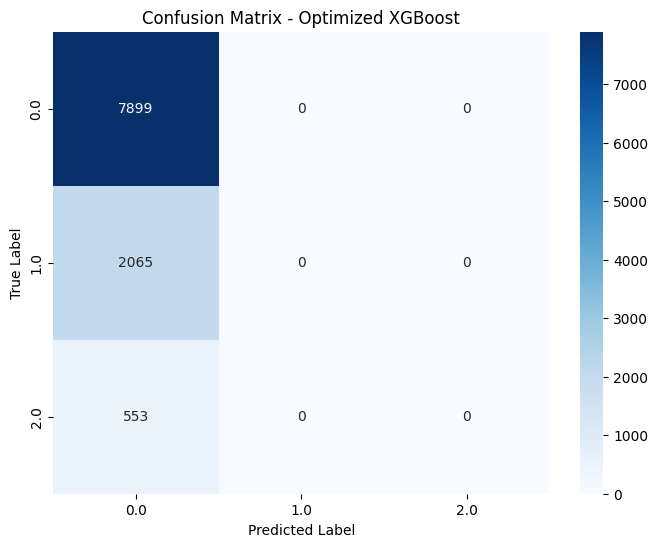

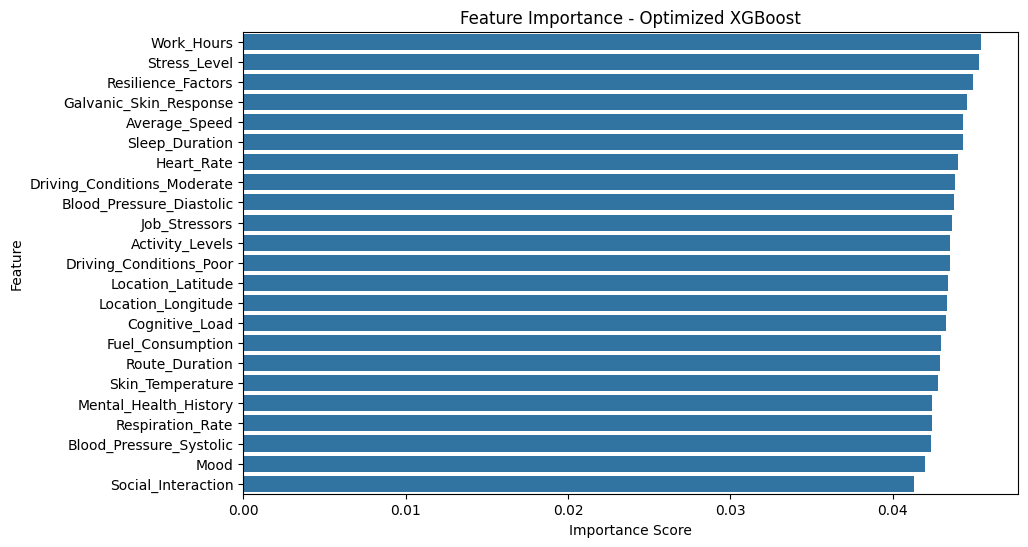

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'
data = pd.read_csv(data_path)

# Preprocessing
features = data.drop(columns=["Timestamp", "Mental_Health_Status"])
target = data["Mental_Health_Status"]

# Handle categorical features
features_encoded = pd.get_dummies(features, columns=["Driving_Conditions"], drop_first=True)

# Feature importance analysis
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(features_encoded, target)
feature_importance = pd.Series(xgb.feature_importances_, index=features_encoded.columns).sort_values(ascending=False)

# Select top features
top_features = feature_importance[feature_importance > 0.01].index
X_top = features_encoded[top_features]
y = target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42, stratify=y)

# Hyperparameter tuning with RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, y.value_counts(normalize=True)[0] / y.value_counts(normalize=True)[1]],  # Handle imbalance
}

xgb_random_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    param_distributions=param_distributions,
    n_iter=20,
    scoring='accuracy',
    cv=5,
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb_random_search.fit(X_train, y_train)

# Retrieve the best model and parameters
best_xgb_model = xgb_random_search.best_estimator_
best_params = xgb_random_search.best_params_

# Evaluate the best model
y_pred = best_xgb_model.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Display metrics
print(f"Best Hyperparameters: {best_params}")
print("\nMetrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Ensure target names are properly formatted
target_names = [str(cls) for cls in sorted(y.unique())]

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix - Optimized XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[top_features], y=top_features)
plt.title("Feature Importance - Optimized XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '/content/drive/My Drive/ML Mental Health Monitoring System/data.csv'
data = pd.read_csv(data_path)

# Preprocessing
features = data.drop(columns=["Timestamp", "Mental_Health_Status"])
target = data["Mental_Health_Status"]

# Encode categorical features
features_encoded = pd.get_dummies(features, columns=["Driving_Conditions"], drop_first=True)

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(target)
y_categorical = to_categorical(y_encoded)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_encoded)

# Reshape for LSTM input (samples, timesteps, features)
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded)

# Build the LSTM model
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2]), activation='relu', return_sequences=True),
    Dropout(0.3),
    LSTM(64, activation='relu', return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Predict the test set
y_pred_prob = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Compute metrics
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Display metrics
print("\nMetrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=le.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - LSTM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot Training History
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7514 - loss: 0.7351 - val_accuracy: 0.7511 - val_loss: 0.6903
Epoch 2/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7492 - loss: 0.6926 - val_accuracy: 0.7511 - val_loss: 0.6904
Epoch 3/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7482 - loss: 0.6931 - val_accuracy: 0.7511 - val_loss: 0.6916
Epoch 4/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7507 - loss: 0.6909 - val_accuracy: 0.7511 - val_loss: 0.6911
Epoch 5/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.7518 - loss: 0.6871 - val_accuracy: 0.7511 - val_loss: 0.6904
Epoch 6/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7527 - loss: 0.6862 - val_accuracy: 0.7511 - val_loss: 0.6908
Epoch 7/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7510 - loss: 0.6872 - val_accuracy: 0.7511 - val_loss: 0.6928
Epoch 8/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7507 - loss: 0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Metrics:
Accuracy: 0.7488
Precision: 0.5966
Recall: 0.7488
F1 Score: 0.6442

Classification Report:


TypeError: object of type 'numpy.float64' has no len()